In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from PIL import Image
%matplotlib inline

In [3]:
def converged(centroids, old_centroids):
	if len(old_centroids) == 0:
		return False

	if len(centroids) <= 5:
		a = 1
	elif len(centroids) <= 10:
		a = 2
	else:
		a = 4

	for i in range(0, len(centroids)):
		cent = centroids[i]
		old_cent = old_centroids[i]
		if ((int(old_cent[0]) - a) <= cent[0] <= (int(old_cent[0]) + a)) and ((int(old_cent[1]) - a) <= cent[1] <= (int(old_cent[1]) + a)) and ((int(old_cent[2]) - a) <= cent[2] <= (int(old_cent[2]) + a)):
			continue
		else:
			return False
	return True

# ======
# getMin
# ======
#
# Method used to find the closest centroid to the given pixel.
#
def getMin(pixel, centroids):
	minDist = 9999
	minIndex = 0

	for i in range(0, len(centroids)):
		d = np.sqrt(int((centroids[i][0] - pixel[0]))**2 + int((centroids[i][1] - pixel[1]))**2 + int((centroids[i][2] - pixel[2]))**2)
		if d < minDist:
			minDist = d
			minIndex = i

	return minIndex
#end getMin




# ============
# assignPixels
# ============
def assignPixels(centroids):
	clusters = {}
	
	for x in range(im.size[0]):
		for y in range(im.size[1]):
			minIndex = getMin(px[x, y], centroids)
			if minIndex in clusters:
				clusters[minIndex].append(px[x, y])
			else:
				clusters[minIndex] = [px[x, y]]
	return clusters

#end assignPixels



# ===============
# adjustCentroids
# ===============

def adjustCentroids(clusters):
	new_centroids = []
	for i in clusters.keys():
		if i not in clusters:
			continue
		cluster = clusters[i]
		r = 0
		g = 0
		b = 0
		for j in range(len(cluster)):
			r += cluster[j][0]
			g += cluster[j][1]
			b += cluster[j][2]
		new_centroids.append([r//len(cluster), g//len(cluster), b//len(cluster)])

        ## Write your code here
	return new_centroids

#end adjustCentroids


# ===========
# initializeKmeans
# ===========
#
# Used to initialize the k-means clustering
#
def initializeKmeans(someK):
	centroids = []
	img_width, img_height = im.size
	for _ in range(0, someK):
		i,j = np.random.randint(0, img_width), np.random.randint(0, img_height)
		centroids.append(px[i, j])	

	# print("Centroids Initialized")
	# print("===========================================")

	return centroids
#end initializeKmeans





# ===========
# iterateKmeans
# ===========
#
# Used to iterate the k-means clustering
#
def iterateKmeans(centroids):
	old_centroids = []
	# print("Starting Assignments")
	# print("===========================================")
	MAX_ITERATIONS = 20
	iteration = 0
	while not converged(centroids, old_centroids) and iteration < MAX_ITERATIONS:
		old_centroids = centroids
		clusters = assignPixels(centroids)
		centroids = adjustCentroids(clusters)
		iteration += 1
	
	# print("===========================================")
	# print("Convergence Reached!")
	return centroids, mse(centroids, clusters)

def mse(centroids, clusters):
	total = 0
	for i in clusters.keys():
		cluster = clusters[i]
		for j in range(len(cluster)):
			total += np.sqrt(int((centroids[i][0] - cluster[j][0]))**2 + int((centroids[i][1] - cluster[j][1]))**2 + int((centroids[i][2] - cluster[j][2]))**2)
	return total

		## Write your code here

def drawWindow(result):
	img_width, img_height = im.size
	img = Image.new('RGB', (img_width, img_height), "white")
	p = img.load()

	for x in range(img.size[0]):
		for y in range(img.size[1]):
			RGB_value = result[getMin(px[x, y], result)]
			p[x, y] = tuple(RGB_value)

	img.show()
	


In [14]:
num_input = "2"
k_input = 3

img = "img/test" + num_input.zfill(2) + ".jpg"
im = Image.open(img)
img_width, img_height = im.size
px = im.load()

initial_centroid=initializeKmeans(k_input)
result, error = iterateKmeans(initial_centroid)
print("MSE: ", error)

Centroids Initialized
Starting Assignments
Convergence Reached!
MSE:  2528703.6960206535


In [47]:
num_input = "3"
k_inputs = list(range(1, 21))

img = "img/test" + num_input.zfill(2) + ".jpg"
im = Image.open(img)
img_width, img_height = im.size
px = im.load()
results = []
errors = []

for i, k_input in tqdm(enumerate(k_inputs)):
    initial_centroid=initializeKmeans(k_input)
    result, error = iterateKmeans(initial_centroid)
    results.append(result)
    errors.append(error)



20it [16:56, 50.80s/it]


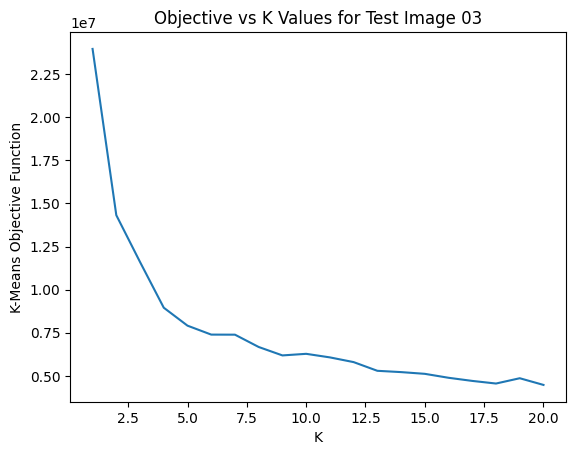

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_inputs, errors)
ax.set_yscale('linear')
ax.set_xlabel("K")
ax.set_ylabel("K-Means Objective Function")
ax.title.set_text("Objective vs K Values for Test Image 03")
plt.show()

In [67]:
num_input = "5"
k_input = 2

img = "img/test" + num_input.zfill(2) + ".jpg"
im = Image.open(img)
img_width, img_height = im.size
px = im.load()
results = []
errors = []

for _ in tqdm(range(10)):
    initial_centroid = initializeKmeans(k_input)
    result, error = iterateKmeans(initial_centroid)
    results.append(result)
    errors.append(error)



100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


In [65]:
from functools import lru_cache

@lru_cache(maxsize=100)
def calcImg(result):
	base_img = np.array(im)
	img_width, img_height, _ = base_img.shape
	img = np.zeros((img_width, img_height, 3), dtype=np.uint8)

	for x in range(img_width):
		for y in range(img_height):
			RGB_value = result[getMin(base_img[x, y], result)]
			img[x, y, :] = tuple(RGB_value)
	return img
	# img.show()
	

100%|██████████| 10/10 [00:17<00:00,  1.77s/it]


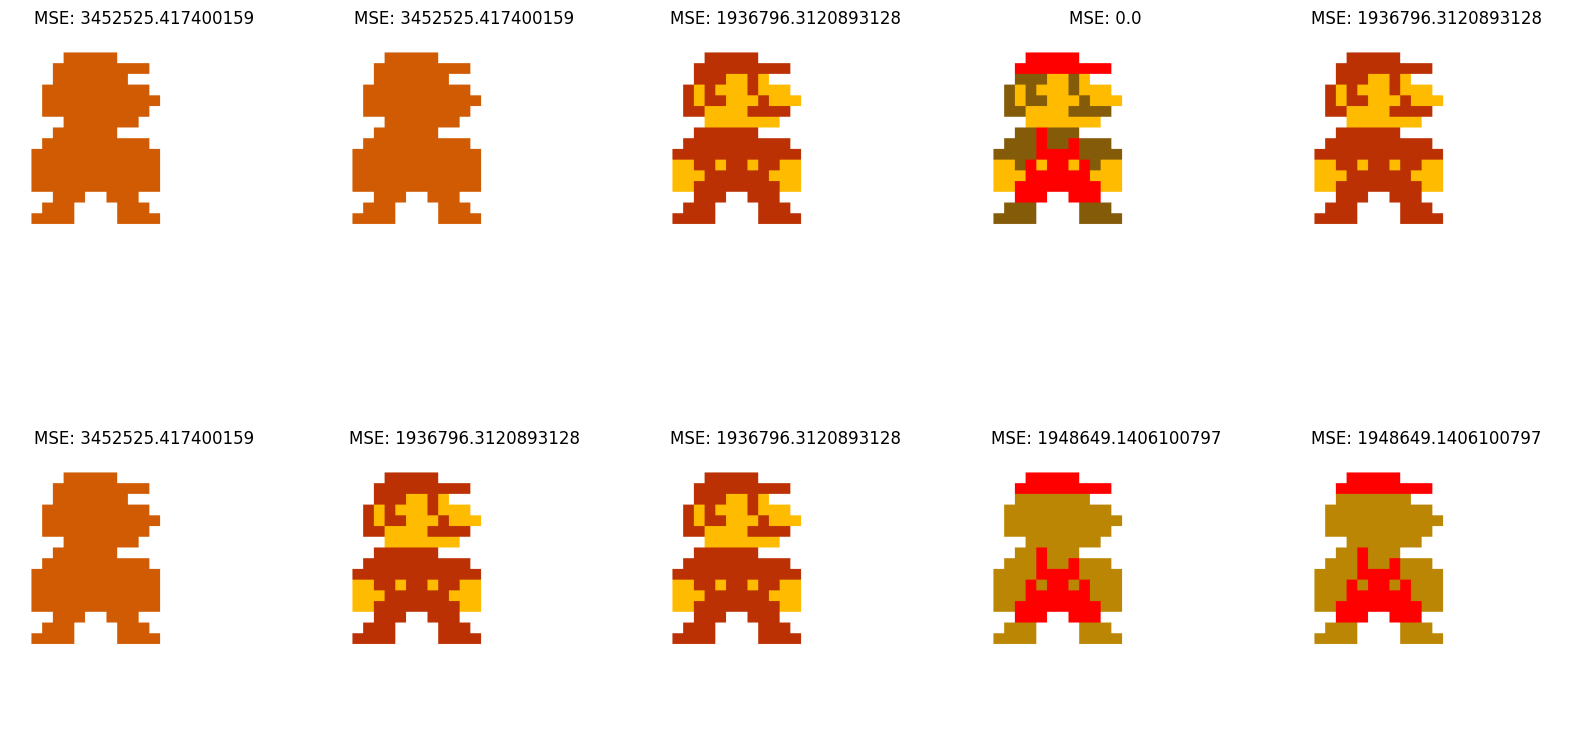

In [66]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
for i in tqdm(range(10)):
    x,y = i//5, i%5
    tuple_result = tuple(map(tuple, results[i]))
    ax[x,y].imshow(calcImg(tuple_result))
    ax[x,y].set_title("MSE: " + str(errors[i]))
    ax[x,y].axis('off')
plt.show()

In [75]:
num_input = "8"
k_input = 5

img = "img/test" + num_input.zfill(2) + ".jpg"
im = Image.open(img)
img_width, img_height = im.size
px = im.load()
results = []
errors = []

for _ in tqdm(range(10)):
    initial_centroid = initializeKmeans(k_input)
    result, error = iterateKmeans(initial_centroid)
    results.append(result)
    errors.append(error)

100%|██████████| 10/10 [01:39<00:00,  9.91s/it]


(-0.5, 199.5, 199.5, -0.5)

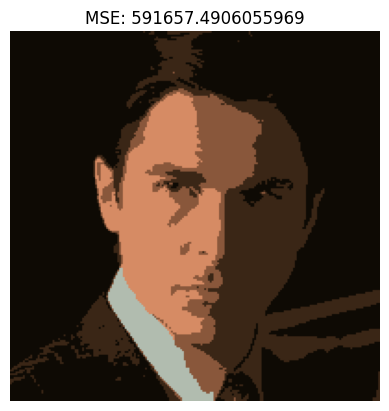

In [76]:
best_result = results[np.argmin(errors)]
tuple_result = tuple(map(tuple, best_result))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(calcImg(tuple_result))
ax.set_title("MSE: " + str(errors[np.argmin(errors)]))
ax.axis('off')